# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True
import re
import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [4]:
df = data.copy()

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(axis=0, how='any', inplace=True)

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [8]:
print(f'В данных {df.duplicated().sum()} дубликатов')

В данных 5225 дубликатов


In [9]:
# Удаляю дубликаты строк
df.drop_duplicates(inplace=True)

In [10]:
print(f'После удаления дубликатов в данных осталось {df.shape[0]} наблюдений')

После удаления дубликатов в данных осталось 401604 наблюдений


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [11]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [ ]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

df['QuantityCanceled'] = get_quantity_canceled(df)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [8]:
# Df  была обработана в Colab и загружена с результатами работы функции
df = pd.read_csv('data/df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
print(f'{df.QuantityCanceled.isnull().sum()} Транзакций в данных не имеют контрагентов')

1303 Транзакций в данных не имеют контрагентов


In [10]:
# Удаляю транзакции без контрагентов
df.dropna(axis=0, how='any', inplace=True)

In [11]:
# поиск транзакций в которых количество отмен одинаково с количеством товара
list_index = []
for index, col in df.iterrows():
    if col['Quantity'] - col['QuantityCanceled'] == 0:
        list_index.append(index)
    # # поиск транзакций в которых количество товара отрицательное
    if col['Quantity'] < 0:
        list_index.append(index)
# Удаляю транзакции с отрицательным количеством товара
df.drop(index=list_index, inplace=True,)

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [12]:
# Проверка на наличие специализированных транзакций
df_spec = df.loc[df['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]
df_spec['StockCode'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [13]:
# Удаляю строки со специальными транзакциями
list_indexSpec = df.loc[df['StockCode'].str.contains('^[a-zA-Z]+', regex = True)].index
df.drop(index=list_indexSpec, inplace=True,)

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [14]:
# Удаление транзакций с 0 стоимостью товара
df.drop(index=df[df['UnitPrice'] == 0].index, inplace=True)

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [15]:
# Создаю целевой стлбец и заполняю его 0
df['TotalPrice'] = pd.Series(np.zeros(df.shape[0]), index=df.index) 
# Расчёт столбца с итоговой выручкой
for index, col in df.iterrows():
    df['TotalPrice'].loc[index] = col['UnitPrice'] * (col['Quantity'] - col['QuantityCanceled'])

In [16]:
# Сохраняю предобработанный df
df.to_csv('data/df_clear.csv', index=False)

In [2]:
df_clear = pd.read_csv('data/df_clear.csv')

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [3]:
# Пять стран с самыми большими закупками за всё время
df_max_revenue = pd.DataFrame(df_clear.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:5])
df_max_revenue

,TotalPrice
Country,
United Kingdom,6797691.44
Netherlands,283443.54
EIRE,247074.57
Germany,201520.71
France,181529.63


Самые большие продажи по странам в порядке убывания это: Англия, Нидерланды, Ирландия, Германия, Франция.
Причём Англия опережает ближайшую страну почти в три раза

In [19]:
# Пять стран с самыми частыми закупками за всё время
df_max_count = pd.DataFrame(df_clear['Country'].value_counts()[:5])
df_max_count

,count
Country,
United Kingdom,346805
Germany,8591
France,7961
EIRE,7011
Spain,2393


Самые большие продажи по странам в порядке убывания это: Англия, Германия, Франция, Ирландия, Испания.
Причём Англия опережает ближайшую страну почти в три раза

Text(0.5, 1.0, 'Пять стран с самыми частыми закупками за всё время')

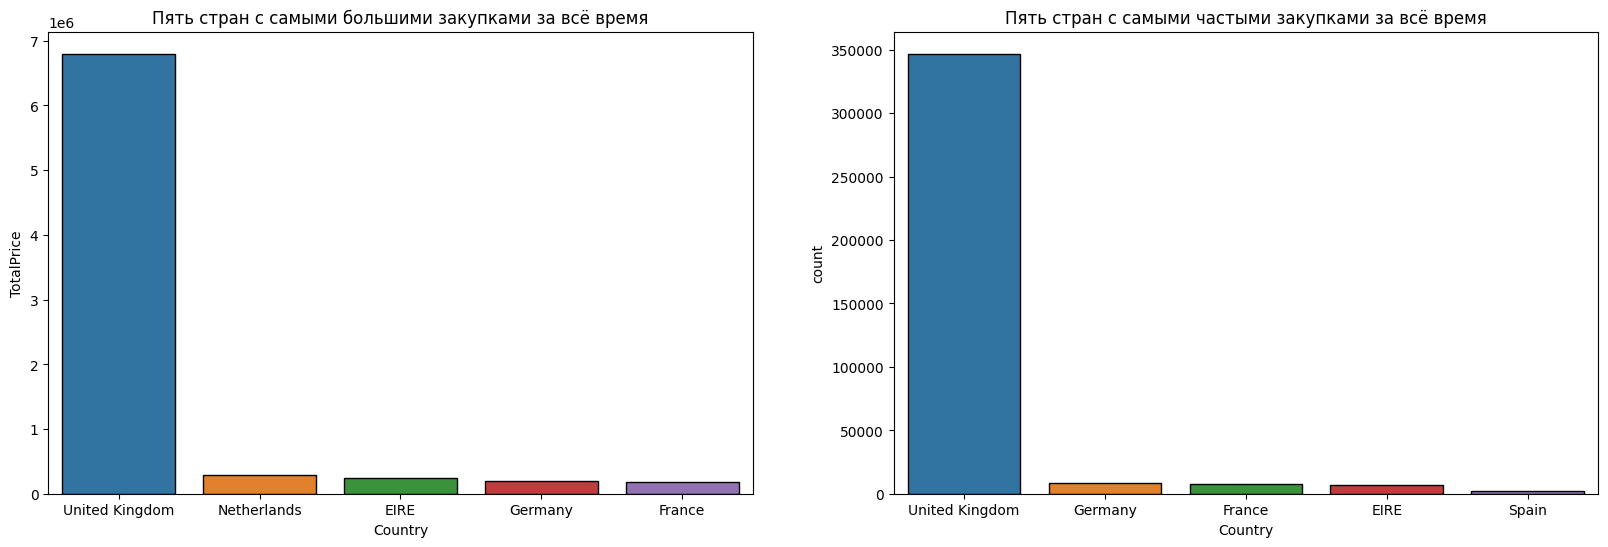

In [20]:
# Построение визуализации самых активных в закупках стран
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.barplot(
    data=df_max_revenue,
    x=df_max_revenue.index,
    y='TotalPrice',
    ax=axes[0]
)
axes[0].set_title('Пять стран с самыми большими закупками за всё время', fontsize=12)
sns.barplot(
    data=df_max_count,
    x=df_max_count.index,
    y='count',
    ax=axes[1]
)
axes[1].set_title('Пять стран с самыми частыми закупками за всё время', fontsize=12)

In [21]:
df_clear['InvoiceDate'] = pd.to_datetime(df_clear['InvoiceDate'])
df_clear['quarter'] = df_clear['InvoiceDate'].dt.quarter

Text(0.5, 1.0, 'Страны с максимальными закупками по кварталам')

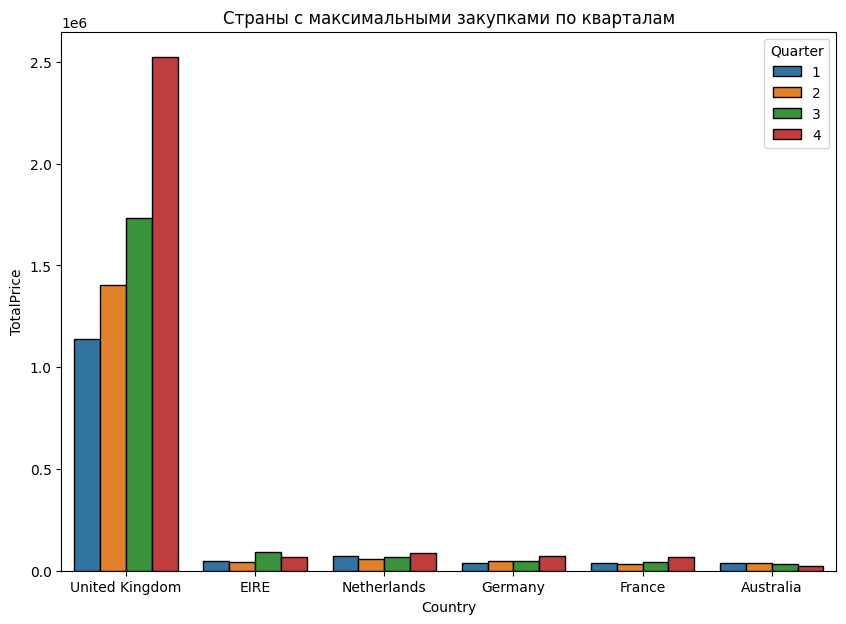

In [22]:
# страны приносящие наибольшую сезонную выручку
# Группировка по кварталам и странам и сумма по продаже с выводом первых максимальных строк
df_quarter = pd.DataFrame(df_clear.groupby(by=['quarter', 'Country'])['TotalPrice'].sum().sort_values(ascending=False)[:24])
# Создание столбцов Country и Quarter из значений мультииндекса
df_quarter['Country'] = [df_quarter.index.values[x][1] for x in range(df_quarter.shape[0])]
df_quarter['Quarter'] = [df_quarter.index.values[x][0] for x in range(df_quarter.shape[0])]

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=df_quarter,
    x='Country',
    y='TotalPrice',
    hue='Quarter',
)
barplot.set_title('Страны с максимальными закупками по кварталам')

Если судить по показателям Англии, то максимальные закупки наблюдаются в четвёртый квартал, такое же распределение закупок и Нидерландов, Германии и Франции. В остальных странах такая тенденция не наблюдается

* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

In [23]:
# Создание столбца с днями месяцев
df_clear['Day'] = df_clear['InvoiceDate'].dt.day
# Создание столбца с часами дня
df_clear['Hour'] = df_clear['InvoiceDate'].dt.hour

Text(0.5, 1.0, 'Количество покупок в среднем по часам дня')

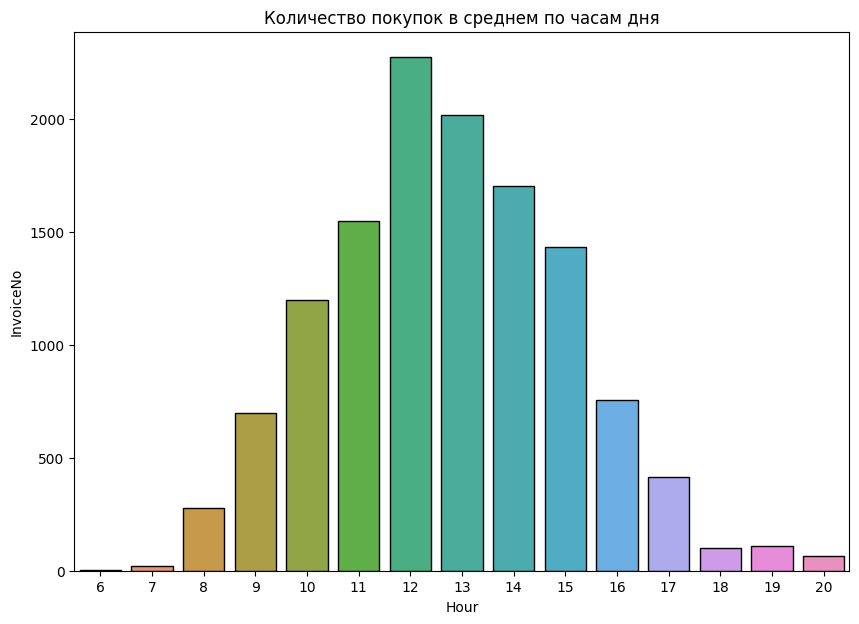

In [24]:
# Группировка по дням месяца и часам дня с подсчётом количества покупок
df_day = pd.DataFrame(df_clear.groupby(by=['Day', 'Hour'])['InvoiceNo'].count())
# Создание df со столбцом из значения индекса
df_day['Hours'] = [df_day.index.values[x][1] for x in range(df_day.shape[0])]
# Группировка по часам дня и подсчёт среднего количества покупок
df_day_mean = pd.DataFrame(df_day.groupby('Hours')['InvoiceNo'].mean())
# Создание df со столбцом из значения индекса
df_day_mean['Hour'] = [df_day_mean.index.values[x] for x in range(df_day_mean.shape[0])]

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=df_day_mean,
    x='Hour',
    y='InvoiceNo',
)
barplot.set_title('Количество покупок в среднем по часам дня')

In [25]:
# Сохраняю предобработанный df
df_clear.to_csv('data/df_clear.csv', index=False)

In [2]:
df_clear = pd.read_csv('data/df_clear.csv')
# Так как формат DateTime при записи файла не сохраняется, каждый раз при чтении надо преобразовывать столбец с датой
df_clear['InvoiceDate'] = pd.to_datetime(df_clear['InvoiceDate'])

Согласно получившегося графика можно сделать вывод, что среднее количество покупок по часам дня практически нормально распределено

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [3]:
# Группировка по CustomerID','InvoiceDate', 'TotalPrice'
df_rfm = pd.DataFrame(df_clear.groupby('CustomerID')[['InvoiceDate', 'TotalPrice']])
#Создание точки отсчёта по дате прибавление одного дня к максимальной 11 часов и 10 минут
t0 = df_clear['InvoiceDate'].max() + datetime.timedelta(hours=11, minutes=10)
# Создание целевых столбцов заполненных 0
df_rfm['Recency'] = pd.Series(np.zeros(df_rfm.shape[0]), index=df_rfm.index)
df_rfm['Frequency'] = pd.Series(np.zeros(df_rfm.shape[0]), index=df_rfm.index)
df_rfm['Monetary'] = pd.Series(np.zeros(df_rfm.shape[0]), index=df_rfm.index)
for index, col in df_rfm.iterrows():
    # Создаём промежуточный DataFrame из всех целевых данных
    df_rfm_temp = pd.DataFrame({'CustomerID': col[0], 'InvoiceNo': col[1].index,
                         'InvoiceDate': col[1]['InvoiceDate'].values,
                         'TotalPrice': col[1]['TotalPrice'].values})
    # Расчёт и заполнение целевых столбцов
    # Сколько дней с последнего заказа
    df_rfm['Recency'].loc[index] = (t0 - df_rfm_temp['InvoiceDate'].max()).days
    # Как часто клиент делал заказы
    df_rfm['Frequency'].loc[index] = df_rfm_temp['InvoiceNo'].count()
    # Какую выручку принёс клиент с учётом возвратов
    df_rfm['Monetary'].loc[index] = df_rfm_temp['TotalPrice'].sum()

# Удаление временного столбца
df_rfm.drop(1, axis=1, inplace=True)
# Переимнование колонок
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [11]:
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12347,2.0,182.0,4310.00
1,12348,75.0,27.0,1437.24
2,12349,18.0,72.0,1457.55
3,12350,310.0,16.0,294.40
4,12352,36.0,70.0,1265.41
...,...,...,...,...
4319,18280,277.0,10.0,180.60
4320,18281,180.0,7.0,80.82
4321,18282,7.0,12.0,176.60
4322,18283,3.0,719.0,2039.58


<Axes: xlabel='Monetary', ylabel='Count'>

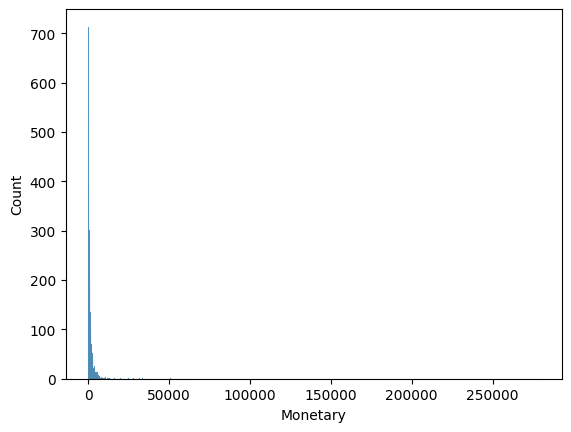

In [33]:
sns.histplot(df_rfm['Monetary'])

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [29]:
boxes = [px.box(df_rfm, x=column) for column in df_rfm.columns[1:]]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [4]:
# Функция ограничивающая сверху квантилем уровня 0,95
def outliers_iqr(data, feature):
    for col in feature:
        x = data[col]
        data = data[(x <= x.quantile(0.95))]
    return data

In [5]:
df_rfm = outliers_iqr(df_rfm, ['Frequency', 'Monetary'])

In [7]:
boxes = [px.box(df_rfm, x=column) for column in df_rfm.columns[1:]]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.show()

После удаления выбросов по столбцам Frequency, Monetary и сохранения данных в рвмере 95 квантиля - графики выровнялись, хотя выбросы ещё остались

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [6]:
# Переиндексация
df_rfm = df_rfm.reset_index(drop = True)
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df_rfm[df_rfm.columns[1:]])
#определяем метод главных компонент с двумя признаками
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
X_pca = pca.fit_transform(df_std)
len(X_pca[0])

2

In [7]:
# Создание итогового DF с мульти индексом для сбора данных работы кластеризаций
df_best_metrics = pd.DataFrame(columns=['KMeans', 'EM', 'Aglomerative'], index=[['silhouette_score', 'silhouette_score', 'calinski_harabasz_score', 
        'calinski_harabasz_score', 'davies_bouldin_score', 'davies_bouldin_score'], ['metrics', 'clasters', 'metrics', 'clasters', 'metrics', 'clasters']])

In [8]:
# Функция для расчёта оптимального количества кластеров методом KMeans и значения метрики
# Так как лучшие значения метрики отличаются в разных методах, в первых двух чем больше тем лучше, 
# а в последнем чем меньше тем лучше, разделил на два варианта фиксирования лучшего результата
def internal_metrics(X, internal_metric):
    metric_dict = {}
    # Первый чем больше тем лучше
    if internal_metric != davies_bouldin_score:
        metric_dict['metric'] = -1
        for clast in range(3, 11):
            clustering = KMeans(n_clusters=clast, random_state=42).fit(X)
            y_pred = clustering.labels_
            metric_a = internal_metric(X, y_pred)
            if metric_a > metric_dict['metric']:
                metric_dict['metric'] = round(metric_a, 2)
                metric_dict['clasters'] = clast
        # Сбор данных в итоговую таблицу 
        df_best_metrics['KMeans'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['KMeans'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']
    else:
        # второй чем меньше тем лучше
        metric_dict['metric'] = 5
        for clast in range(3, 11):
            clustering = KMeans(n_clusters=clast, random_state=42).fit(X)
            y_pred = clustering.labels_
            metric_a = internal_metric(X, y_pred)
            if metric_a < metric_dict['metric']:
                metric_dict['metric'] = round(metric_a, 2)
                metric_dict['clasters'] = clast
        # Сбор данных в итоговую таблицу 
        df_best_metrics['KMeans'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['KMeans'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']

    return metric_dict

In [9]:
# Чтобы вывести только название метрики пришлось преобразовать в строку, разделить по пробелам и вывести только название метрики, 
# иначе куча левой информации
list_km = []
for x in [silhouette_score, calinski_harabasz_score, davies_bouldin_score]:
    print('Итоговое значение метрики {}: {}' .format(str(x).split(' ')[1], internal_metrics(X_pca, x)))

Итоговое значение метрики silhouette_score: {'metric': 0.52, 'clasters': 3}
Итоговое значение метрики calinski_harabasz_score: {'metric': 6199.97, 'clasters': 4}
Итоговое значение метрики davies_bouldin_score: {'metric': 0.64, 'clasters': 3}


После подбора количества кластеров в диапазоне от 3 до 10 методом KMeans и оценкой качества кластеризации внутренними метриками получил следующие результаты:
* метрики **Коэффициент силуета** и **Дэвиса - Болдина** сошлись на трёх кластерах. 
* метрика **Индекс Калински Харабаса** показывает что точнее будет разбиение на четыре кластера

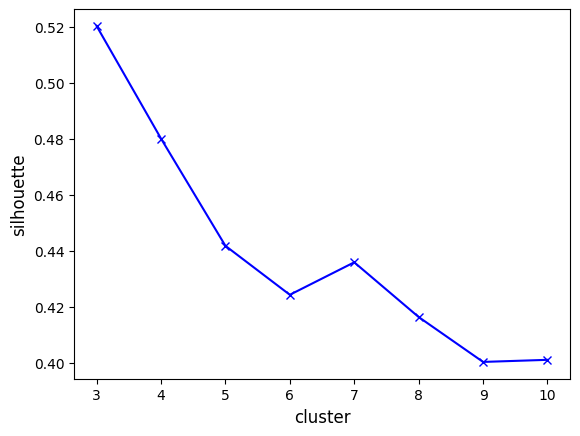

In [93]:
# Поиск оптимального количества кластеров методом силуета

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 11):
    silhouettes.append(get_silhouette(i, X_pca))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], silhouettes, 'xb-')

График **Коэффициента силуета** наглядно показывает оптимальное количество кластеров = 3

In [10]:
df_k_means = df_rfm.copy()
# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42)
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X_pca)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
df_k_means['labels'] = labels
df_k_means['labels'].value_counts(ascending=True)

labels
0     807
2     996
1    2098
Name: count, dtype: int64

Кластеризация методом KMeans по оптимальному количеству кластеров

In [16]:
df_k_means

,CustomerID,Recency,Frequency,Monetary,labels
0,12348,75.0,27.0,1437.24,1
1,12349,18.0,72.0,1457.55,1
2,12350,310.0,16.0,294.40,2
3,12352,36.0,70.0,1265.41,1
4,12353,204.0,4.0,89.00,2
...,...,...,...,...,...
3896,18278,73.0,9.0,173.90,1
3897,18280,277.0,10.0,180.60,2
3898,18281,180.0,7.0,80.82,2
3899,18282,7.0,12.0,176.60,1


### <center>EM-алгоритм

In [11]:
# Функция для расчёта оптимального количества кластеров методом KMeans и значения метрики
# Так как лучшие значения метрики отличаются в разных методах, в первых двух чем больше тем лучше, 
# а в последнем чем меньше тем лучше, разделил на два варианта фиксирования лучшего результата
from sklearn.mixture import GaussianMixture


def internal_metrics(X, internal_metric):
    metric_dict = {}
    # Первый чем больше тем лучше
    if internal_metric != davies_bouldin_score:
        metric_dict['metric'] = -1
        for clast in range(3, 11):
            y_pred = GaussianMixture(n_components=clast, random_state=42).fit_predict(X)
            metric_a = internal_metric(X, y_pred)
            if metric_a > metric_dict['metric']:
                metric_dict['metric'] = round(metric_a, 2)
                metric_dict['clasters'] = clast
        # Сбор данных в итоговую таблицу 
        df_best_metrics['EM'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['EM'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']
    else:
        # второй чем меньше тем лучше
        metric_dict['metric'] = 5
        for clast in range(3, 11):
            y_pred = GaussianMixture(n_components=clast, random_state=42).fit_predict(X)
            metric_a = internal_metric(X, y_pred)
            if metric_a < metric_dict['metric']:
                metric_dict['metric'] = round(metric_a, 2)
                metric_dict['clasters'] = clast
        # Сбор данных в итоговую таблицу 
        df_best_metrics['EM'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['EM'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']

    return metric_dict

In [12]:
# Чтобы вывести только название метрики пришлось преобразовать в строку, разделить по пробелам и вывести только название метрики, иначе куча левой информации
for x in [silhouette_score, calinski_harabasz_score, davies_bouldin_score]:
    print('Итоговое значение метрики {}: {}' .format(str(x).split(' ')[1], internal_metrics(X_pca, x)))

Итоговое значение метрики silhouette_score: {'metric': 0.45, 'clasters': 3}
Итоговое значение метрики calinski_harabasz_score: {'metric': 4569.91, 'clasters': 3}
Итоговое значение метрики davies_bouldin_score: {'metric': 0.72, 'clasters': 3}


После подбора количества кластеров в диапазоне от 3 до 10 методом EM и оценкой качества кластеризации внутренними метриками получил следующие результаты:
* все три метрики **Коэффициент силуета**, **Дэвиса - Болдина** и **Индекс Калински Харабаса** сошлись на трёх кластерах. 
    * Причём показатели метрики хуже чем у метода KMeans

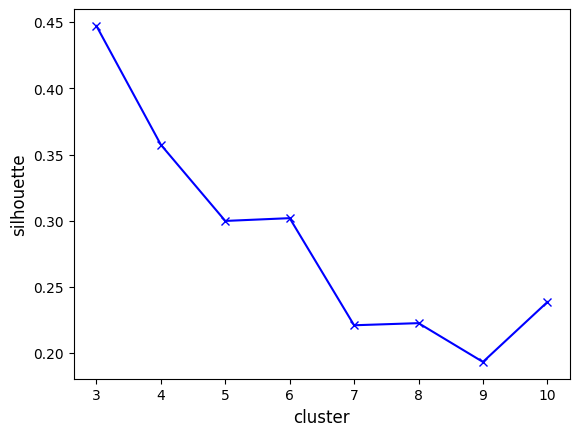

In [98]:
# Поиск оптимального количества кластеров методом силуета

def get_silhouette(cluster_num, X):
    y_pred =  GaussianMixture(n_components=cluster_num, random_state=42).fit_predict(X)
    silhouette = silhouette_score(X, y_pred, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 11):
    silhouettes.append(get_silhouette(i, X_pca))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], silhouettes, 'xb-')

In [13]:
df_EM = df_rfm.copy()
model = GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(X_pca)
df_EM['labels'] = predictions

### <center>Агломеративная иерархическая кластеризация

In [14]:
def internal_metrics(X, internal_metric):
    metric_dict = {}
    # Первый чем больше тем лучше
    if internal_metric != davies_bouldin_score:
        metric_dict['metric'] = -1
        for link in ['ward', 'average', 'complete', 'single']:
            for clast in range(3, 11):
                clustering = AgglomerativeClustering(n_clusters=clast, linkage=link).fit(X)
                y_pred = clustering.labels_
                metric_a = internal_metric(X, y_pred)
                if metric_a > metric_dict['metric']:
                    metric_dict['metric'] = round(metric_a, 2)
                    metric_dict['clasters'] = clast
                    metric_dict['linkage'] = link
        # Сбор данных в итоговую таблицу 
        df_best_metrics['Aglomerative'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['Aglomerative'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']
    else:
        # второй чем меньше тем лучше
        metric_dict['metric'] = 5
        for link in ['ward', 'average', 'complete', 'single']:
            for clast in range(3, 11):
                clustering = AgglomerativeClustering(n_clusters=clast).fit(X)
                y_pred = clustering.labels_
                metric_a = internal_metric(X, y_pred)
                if metric_a < metric_dict['metric']:
                    metric_dict['metric'] = round(metric_a, 2)
                    metric_dict['clasters'] = clast
                    metric_dict['linkage'] = link
        # Сбор данных в итоговую таблицу 
        df_best_metrics['Aglomerative'].loc[str(internal_metric).split(' ')[1], 'metrics'] = metric_dict['metric']
        df_best_metrics['Aglomerative'].loc[str(internal_metric).split(' ')[1], 'clasters'] = metric_dict['clasters']

    return metric_dict

In [15]:
# Чтобы вывести только название метрики пришлось преобразовать в строку, разделить по пробелам и вывести только название метрики, иначе куча левой информации
for x in [silhouette_score, calinski_harabasz_score, davies_bouldin_score]:
    print('Итоговое значение метрики {}: {}' .format(str(x).split(' ')[1], internal_metrics(X_pca, x)))

Итоговое значение метрики silhouette_score: {'metric': 0.49, 'clasters': 3, 'linkage': 'ward'}
Итоговое значение метрики calinski_harabasz_score: {'metric': 5414.91, 'clasters': 4, 'linkage': 'ward'}
Итоговое значение метрики davies_bouldin_score: {'metric': 0.62, 'clasters': 3, 'linkage': 'ward'}


После подбора количества кластеров в диапазоне от 3 до 10 методом Агломеративной кластеризации и оценкой качества внутренними метриками получил следующие результаты:
* метрики **Коэффициент силуета** и **Дэвиса - Болдина** сошлись на трёх кластерах. 
* метрика **Индекс Калински Харабаса** показывает что точнее будет разбиение на четыре кластера
    * Так же этот метод кластеризации показывает не лучшие показатели метрик

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

Так как метод кластеризации KMeans показал лучшие метрики, визуализирую его разбиение данных на кластеры

Кластеры получились разной плотности.
* Самый высокий по плотности - первый кластер
* Самый разреженный - нулевой

In [39]:
# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
from matplotlib import markers


fig = px.scatter_3d(
    data_frame=df_k_means, 
    x = 'Recency', 
    y = 'Frequency', 
    z = 'Monetary', 
    color = 'labels', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [46]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [14]:
df_k_means_group = pd.DataFrame(df_k_means[df_k_means.columns[1:]].groupby('labels').mean())

In [20]:
plot_cluster_profile(df_k_means_group, 3)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

In [118]:
df_best_metrics

KMeans       EM Aglomerative
silhouette_score        metrics      0.52     0.45         0.49
                        clasters        3        3            3
calinski_harabasz_score metrics   6199.97  4569.91      5414.91
                        clasters        4        3            4
davies_bouldin_score    metrics      0.64     0.72         0.62
                        clasters        3        3            3

Согласно полученной итоговой таблице значения метрик на разных методах кластеризации, если брать во внимание коэффициент силуета - самые оптимальные показатели получились по методу KMeans на трёх кластерах. 

У разных методов кластеризации, кластеры вышли разного размера, но если отталкиваться от меры схожести объектов кластера между собой по отношению к другим кластерам - то скорее всего KMeans показал максимально правдоподобную картину разбиения на кластеры.

In [120]:
# Создание и заполнение итогового DF по количественному разбиению на кластеры разными методами кластеризации
df_seperation_clasters = pd.DataFrame({'Clasters': [0, 1, 2]})
df_seperation_clasters['KMeans'] = df_k_means['labels'].value_counts().sort_index().values
df_seperation_clasters['EM'] = df_EM['labels'].value_counts().sort_index().values
df_seperation_clasters['Aglomerative'] = df_aglomerative['labels'].value_counts().sort_index().values

In [121]:
# Размеры кластеров по версии разных методов кластеризации
df_seperation_clasters

,Clasters,KMeans,EM,Aglomerative
0,0,807,952,2541
1,1,2098,1671,572
2,2,996,1278,788


In [21]:
df_k_means.groupby('labels')[['Recency', 'Frequency', 'Monetary']].mean().round(0)

,Recency,Frequency,Monetary
labels,,,
0,39.0,141.0,2182.0
1,51.0,38.0,613.0
2,253.0,22.0,377.0


### Характеристики полученных кластеров

* 0 кластер - второй по размеру 
    * самый активный, имеет самый маленький интервал от последней покупки
    * самую высокую частоту покупок
    * самую высокую монетизацию своих покупок
* 1 кластер - самый многочисленный
    * занимает среднюю позицию по интервалу от последней покупки
    * среднюю частоту покупок но это всего около 27% от нулевого кластера
    * среднюю монетизацию и это всего около 28% от нулевого кластера
* 2 кластер самый пассивный
    * самый большой интервал от последней покупки и это в 6.5 раз больше от нулевого кластера
    * самая маленькая частота покупок что в 6.4 раз меньше от нулевого кластера
    * сая маленькая монетизация - в 5.8 раз меньше от нулевого кластера

**Если рассматривать варианты придания стимула для увеличения покупок - именно на второй кластер надо обратить максимальное внимание**